**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (50 points)

Write separate `toolz` pipelines to generate the following variables

- words: a list of all the words in the files `fortune?.txt` in the `data` directory
- reverse_index: a reverse index of words (key=position, value=word)
- index: an index of words (key=word, value=position)
- cat: a list containing the categorical encoding of words

Finally, use `numpy` to convert `cat` into a one-hot matrix with shape (#words, #unique words)

In [6]:
import glob
import toolz as tz
import toolz.curried as c
import string
import numpy as np

In [7]:
words = tz.pipe(
    glob.glob('data/fortune?.txt'),
    c.map(open),
    c.map(lambda f: f.readlines()),
    tz.concat,
    c.map(lambda x: x.lower()),
    c.map(lambda x: x.translate(str.maketrans('', '', string.punctuation))),
    c.mapcat(lambda x: x.split()),
    list
)

reverse_index = tz.pipe(
    words,
    tz.unique,
    enumerate,
    dict
)

index = tz.pipe(
    reverse_index.items(),
    c.map(lambda x: (x[1], x[0])),
    dict
)

cat = tz.pipe(
    words,
    c.map(lambda x: index[x]),
    list
)

n = len(words)
p = len(index)
m = np.zeros((n, p), dtype='int')
m[range(n), cat] = 1

**2**. (50 points)

Write a simulation of diffusion-limited aggregation. In this simulation, we have $n$ random walkers. Each walker starts from row 0 and a random column number, and in each step, the walker increases the row number by 1 and randomly increments or decrements its column number by 1. If the column number of the walker exceeds the maximum or becomes negative, the walker emerges on the other side (toroidal boundary conditions). At any time, if any of the walkers 8 neighbors is non-zero, the walker stops in that position, and the number of steps taken is recorded in that (row, column).

Write a function `dla(nwalkers, width, height, seed)` that returns a matrix with shape (width, height) after running `nwalkers` random walks as described above. The argument `ssed` is used to initialize a random number seed. Internally, the function should create a (width, height+1) matrix, and initialize the last row to have 1 with all other entries 0.

Plot the returned matrix for the arguments `nwalkers=10000, width=300, height=150, seed=123`. It should look like this:

![dla](figs/dla.png)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
def dla(nwalkers, width, height, seed=123):
    """DLA simulation."""
    
    np.random.seed(seed)

    w = width
    h = height
    xs = np.zeros((h+1, w), dtype=np.int32)
    xs[h,:] = h

    for walker in range(nwalkers):
        j = np.random.randint(0, w)
        for i in range(h):
            j += np.random.choice(np.array([-1,1]))
            j %= (w-1)
            if np.sum(xs[i-1:i+2, j-1:j+2]) > 0:
                xs[i,j] = i
                break
    return xs[:-1, :]

In [5]:
%%time

xs = dla(10000, 300, 150)

CPU times: user 21.2 s, sys: 19.4 ms, total: 21.2 s
Wall time: 21.3 s


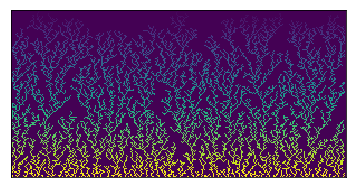

In [6]:
plt.imshow(xs)
plt.xticks([])
plt.yticks([])
pass

In [7]:
from numba import jit

dla_jit = jit(dla, nopython=True)

In [8]:
%%time

xs = dla_jit(10000, 300, 150)

CPU times: user 999 ms, sys: 14.6 ms, total: 1.01 s
Wall time: 1.01 s


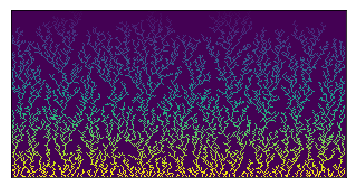

In [9]:
plt.imshow(xs)
plt.xticks([])
plt.yticks([])
pass